<a href="https://colab.research.google.com/github/MainakRepositor/Data-Analysis/blob/master/IPL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IPL Explanatory Data Analysis


## 1. Importing essenial libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
print("Necessary packages included successfully!")

Necessary packages included successfully!


## 2. Importing required datasets

In [110]:
deliveries = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/IPL/deliveries.csv'
matches = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/IPL/matches.csv'

df1 = pd.read_csv(matches,error_bad_lines=False)
df2 = pd.read_csv(deliveries,error_bad_lines=False)

print("All datasets included successfully!")

All datasets included successfully!


In [61]:
df1.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


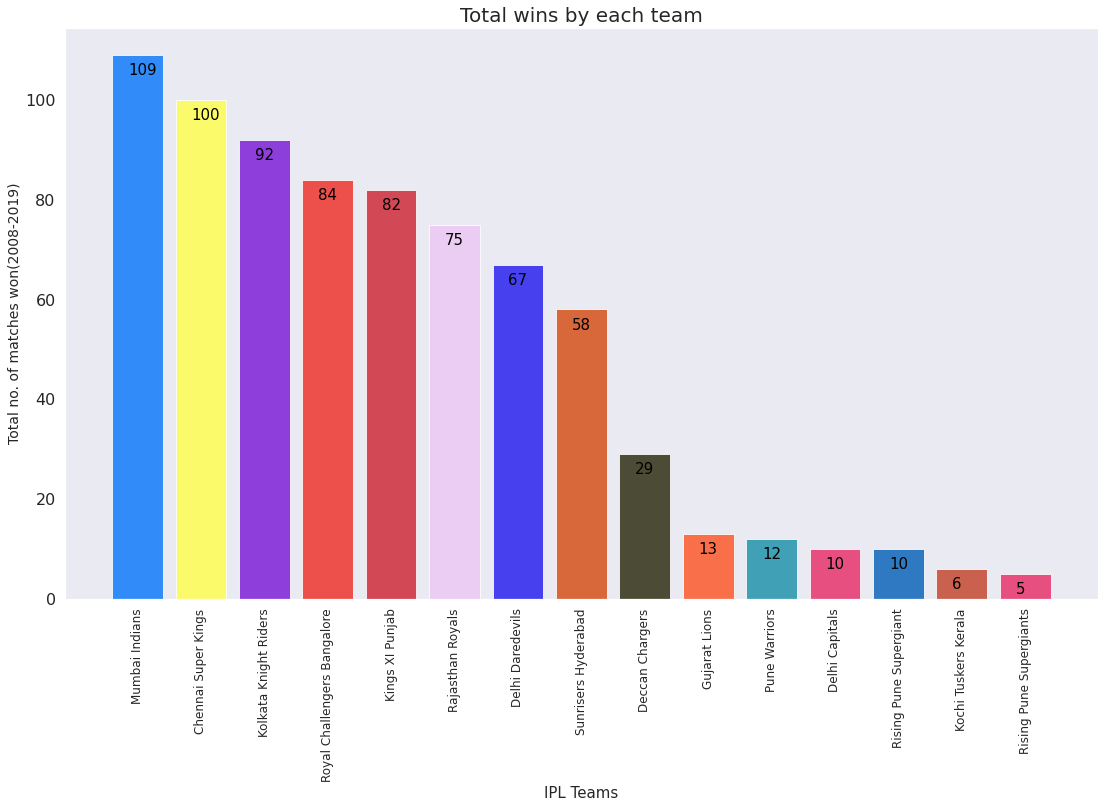

In [113]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(df1['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#0373fc','#FFFF48','#7713d4','#EF2920','#CD202D','#ECC5F2',
               '#1d15ed','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=0)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('IPL Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()

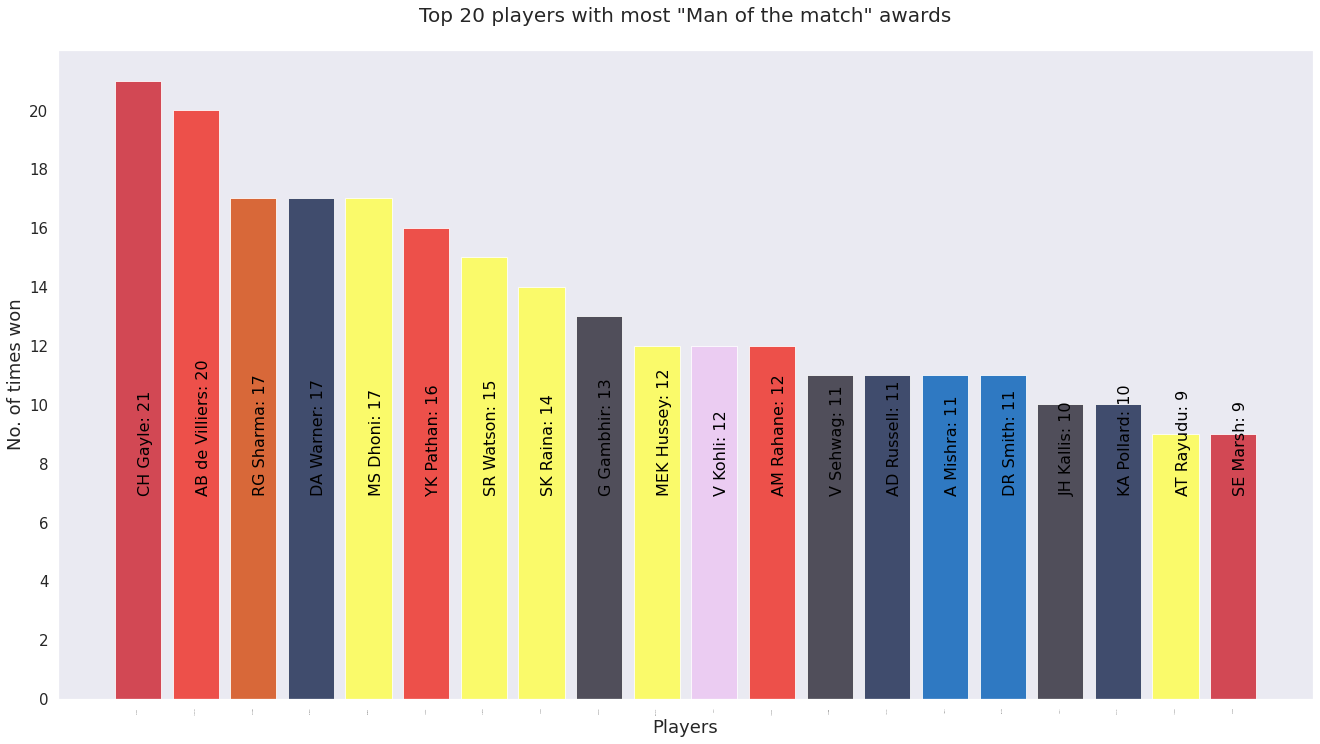

In [102]:
players=pd.DataFrame(df1['player_of_match'].value_counts())
players['name']=players.index
players=players.head(20)
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.bar(players['name'], players['player_of_match'],
        color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'],alpha=0.8)
count=0
for i in players['player_of_match']:
    plt.text(count,7,players['name'][count]+': '+str(i),rotation=90,color='black',size=16)
    count+=1
plt.title('Top 20 players with most "Man of the match" awards\n',fontsize=20)
plt.xlabel('Players',fontsize=18)
plt.ylabel('No. of times won',fontsize=18)
plt.tight_layout()
plt.show()

In [7]:
df2.at[df2['city']=='Bengaluru','city']='Bangalore'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


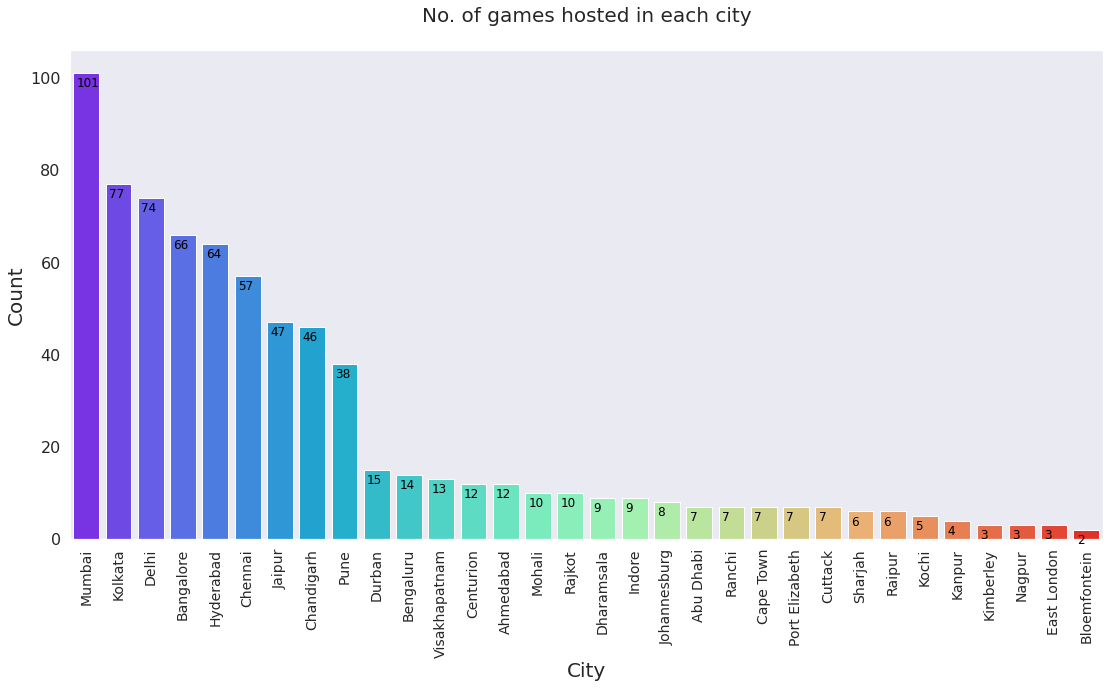

In [101]:
fig=plt.gcf()
fig.set_size_inches(18.5,9)
sns.countplot(df1['city'],order=df1['city'].value_counts().index,palette='rainbow')
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel('City',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('No. of games hosted in each city\n',fontsize=20)
count=0
cities=pd.DataFrame(df1['city'].value_counts())
cities['name']=df1['city'].value_counts().index
for i in cities['city']:
    plt.text(count-0.3,i-3,str(i),rotation=0,color='black',size=12)
    count+=1
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


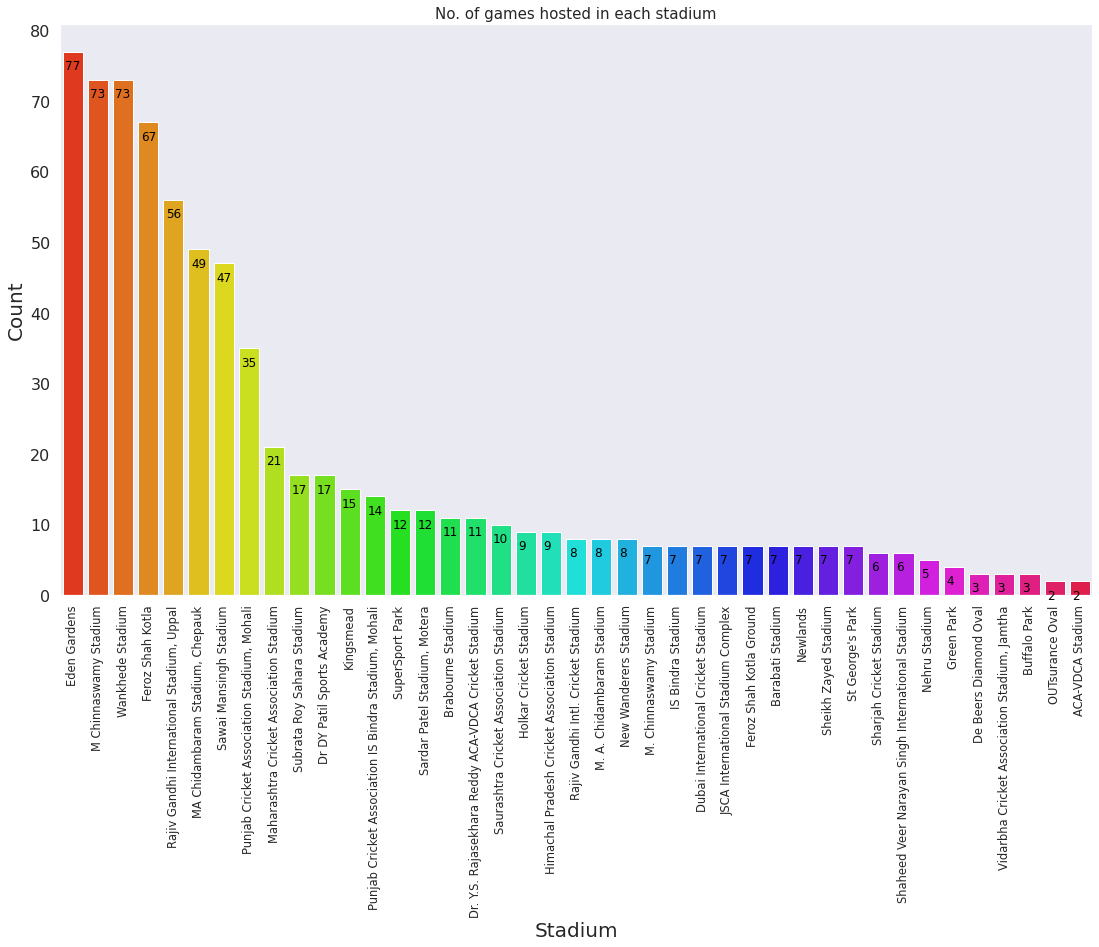

In [100]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.countplot(df1['venue'],order=df1['venue'].value_counts().index,palette='hsv')
plt.xticks(rotation=90,fontsize=11.5)
plt.yticks(fontsize=16)
plt.xlabel('Stadium',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('No. of games hosted in each stadium',fontsize=15)
count=0
venues=pd.DataFrame(df1['venue'].value_counts())
venues['name']=df1['venue'].value_counts().index
for i in venues['venue']:
    plt.text(count-0.3,i-2.5,str(i),rotation=0,color='black',size=12)
    count+=1
plt.show()

In [97]:
kkrcsk=df1[np.logical_or(np.logical_and(df1['team1']=='Kolkata Knight Riders',df1['team2']=='Chennai Super Kings'),np.logical_and(df1['team2']=='Kolkata Knight Riders',df1['team1']=='Chennai Super Kings'))]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


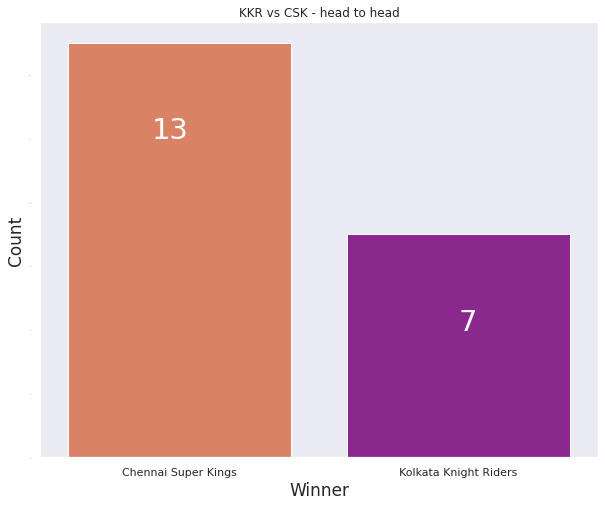

In [98]:
#KKR vs CSK head to head
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(kkrcsk['winner'],order=kkrcsk['winner'].value_counts().index,palette='plasma_r')
plt.text(-0.1,10,str(kkrcsk['winner'].value_counts()['Chennai Super Kings']),size=29,color='white')
plt.text(1.0,4,str(kkrcsk['winner'].value_counts()['Kolkata Knight Riders']),size=29,color='white')
plt.xlabel('Winner',fontsize=17)
plt.ylabel('Count',fontsize=17)
plt.yticks(fontsize=0)
plt.title('KKR vs CSK - head to head')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


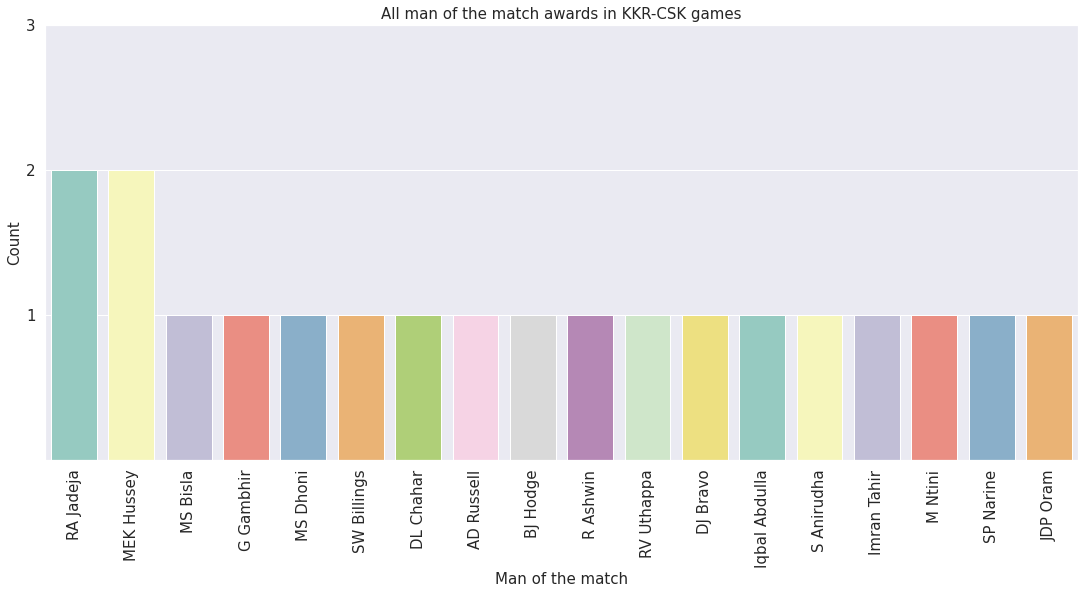

In [12]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(kkrcsk['player_of_match'],order=kkrcsk['player_of_match'].value_counts().index,palette='Set3')
plt.title('All man of the match awards in KKR-CSK games',fontsize=15)
plt.yticks([1,2,3],[1,2,3],fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Man of the match',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


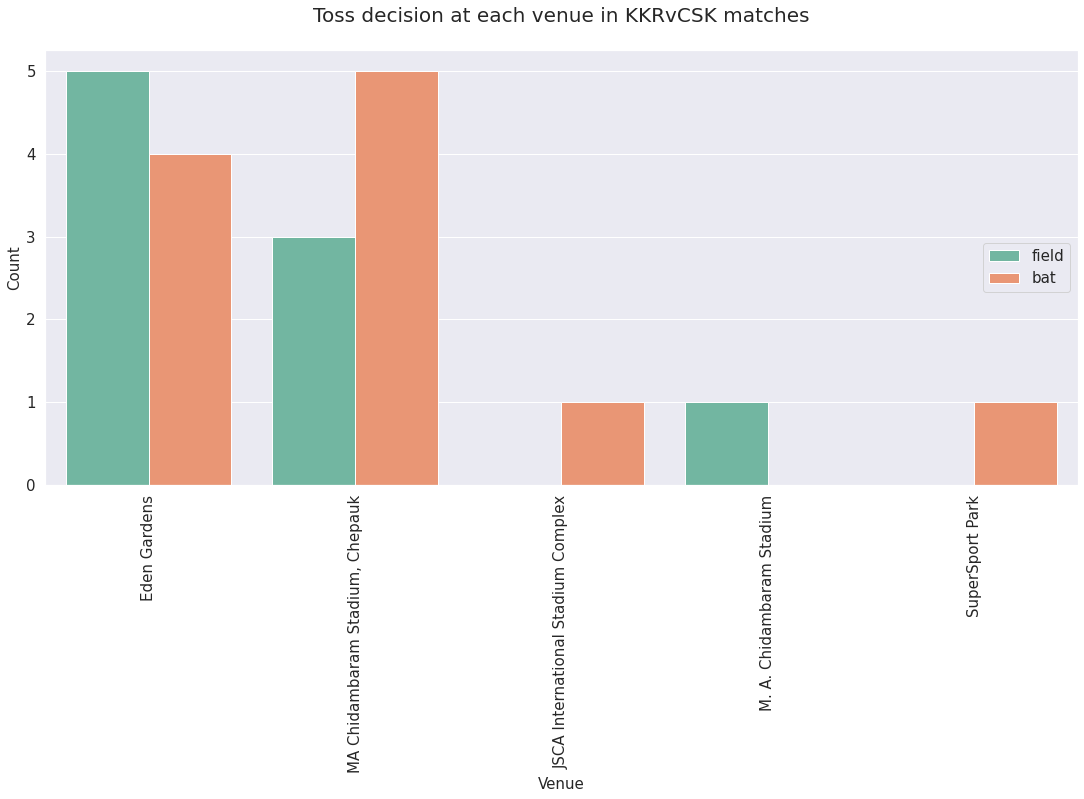

In [96]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(kkrcsk['venue'],order=kkrcsk['venue'].value_counts().index,palette='Set2',hue=df1['toss_decision'])
plt.title('Toss decision at each venue in KKRvCSK matches\n',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Venue',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc=5,fontsize=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


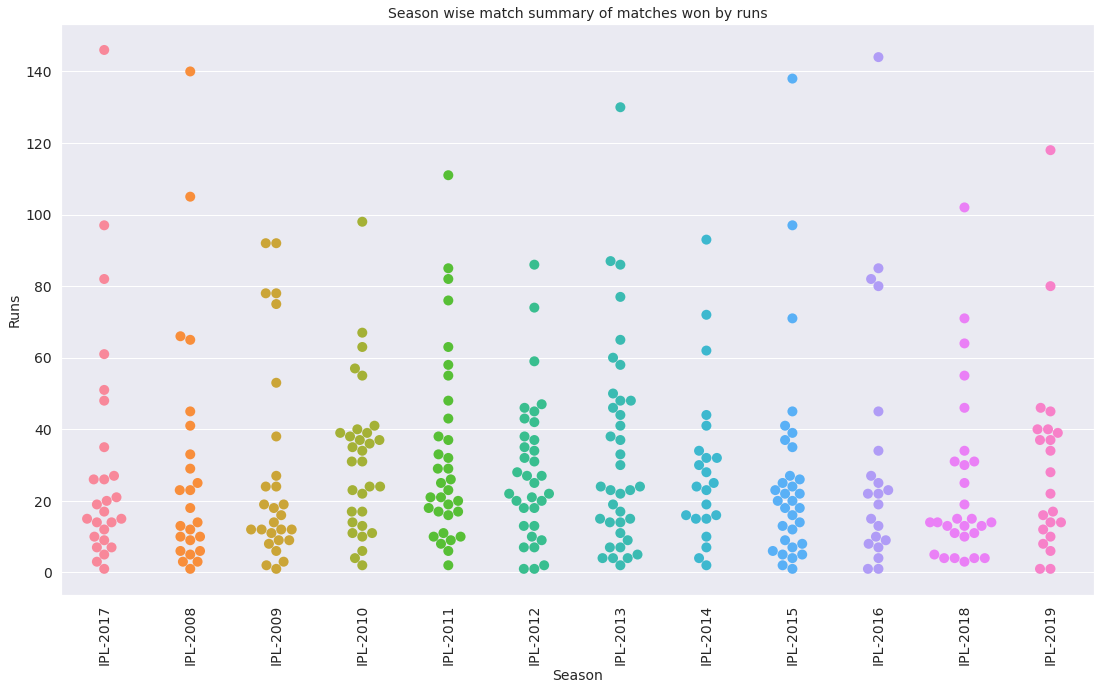

In [14]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.swarmplot(df2['Season'],df2[df2['win_by_runs']!=0]['win_by_runs'],s=10)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Season wise match summary of matches won by runs',fontsize=14)
plt.show()

In [62]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [69]:
print("Number of matches played = ",df2.match_id.max())

Number of matches played =  11415


In [30]:
c=0
for i in df1.is_super_over:
  if i != 0:
    c = c+1
print(c)

81


In [70]:
print("Percentage of super overs in the matches = ",(81/11415)*100)

Percentage of super overs in the matches =  0.709592641261498


In [27]:
d=0
for i in df1.wide_runs:
  if i != 0:
    d = d+1
print(d)

5405


In [28]:
t=0
for i in df1.bye_runs:
  if i != 0:
    t = t+1
print(t)

480


In [33]:
v=0
for i in df1.legbye_runs:
  if i != 0:
    v = v+1
print(v)

2937


In [32]:
v=0
for i in df1.noball_runs:
  if i != 0:
    v = v+1
print(v)

714


## Extras and their weightage

In [34]:
extras = ['wide','bye','legbye','noball']
runs = [5405,480,2937,714]

<Figure size 1440x576 with 0 Axes>

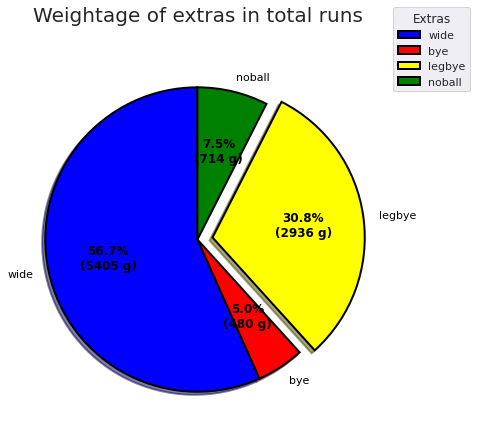

In [51]:
plt.figure(figsize=(20,8))
explode = (0.0, 0.0, 0.1, 0.0) 
  
# Creating color parameters 
colors = ( "blue", "red", "yellow","green") 
  
# Wedge properties 
wp = { 'linewidth' : 2, 'edgecolor' : "black" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(runs,  
                                  autopct = lambda pct: func(pct, runs), 
                                  explode = explode,  
                                  labels = extras, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, extras, 
          title ="Extras", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 1, 2)) 
  
plt.setp(autotexts, size = 12, weight ="bold") 
ax.set_title("Weightage of extras in total runs\n",size=20) 
  
# show plot 
plt.show() 
